<a href="https://colab.research.google.com/github/Shawn1yu/2020-2024-layoff_data_visualization/blob/main/Layoff_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install basemap

In [56]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import os
import warnings
warnings.filterwarnings("ignore")

from google.colab import files
uploaded = files.upload()

Saving layoffs_data.csv to layoffs_data.csv


In [3]:
df = pd.read_csv('layoffs_data.csv')

In [4]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [5]:
df.shape

(3642, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3642 non-null   object 
 1   Location_HQ                 3642 non-null   object 
 2   Industry                    3642 non-null   object 
 3   Laid_Off_Count              2389 non-null   float64
 4   Date                        3642 non-null   object 
 5   Source                      3642 non-null   object 
 6   Funds_Raised                3252 non-null   float64
 7   Stage                       3642 non-null   object 
 8   Date_Added                  3642 non-null   object 
 9   Country                     3642 non-null   object 
 10  Percentage                  2342 non-null   float64
 11  List_of_Employees_Laid_Off  3642 non-null   object 
dtypes: float64(3), object(9)
memory usage: 341.6+ KB


In [7]:
df.describe()

,Laid_Off_Count,Funds_Raised,Percentage
count,2389.000000,3252.000000,2342.000000
mean,257.926329,798.569494,0.281216
std,829.432277,4758.393161,0.287294
min,3.000000,0.000000,0.000000
25%,40.000000,51.000000,0.100000
50%,80.000000,166.000000,0.170000
75%,181.000000,469.250000,0.300000
max,14000.000000,121900.000000,1.000000


In [8]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,3642,2596,Google,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_HQ,3642,240,SF Bay Area,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,3642,31,Finance,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Laid_Off_Count,2389.0,NaN,NaN,NaN,257.926329,829.432277,3.0,40.0,80.0,181.0,14000.0
Date,3642,825,2020-04-02,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,3642,3407,Internal memo,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funds_Raised,3252.0,NaN,NaN,NaN,798.569494,4758.393161,0.0,51.0,166.0,469.25,121900.0
Stage,3642,16,Post-IPO,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_Added,3642,3603,2020-03-28 20:52:49,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,3642,63,United States,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

,0
Company,0
Location_HQ,0
Industry,0
Laid_Off_Count,1253
Date,0
Source,0
Funds_Raised,390
Stage,0
Date_Added,0
Country,0


In [10]:
df['Laid_Off_Count'] = df['Laid_Off_Count'].replace(np.NAN, 0)
df['Funds_Raised'] = df['Funds_Raised'].replace(np.NAN, 0)
df['Percentage'] = df['Percentage'].replace(np.NAN, 0)
df.isnull().sum()

,0
Company,0
Location_HQ,0
Industry,0
Laid_Off_Count,0
Date,0
Source,0
Funds_Raised,0
Stage,0
Date_Added,0
Country,0


In [11]:
df.duplicated().sum()

0

In [12]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['quarter'] = df['Date'].dt.to_period('Q')
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Year,Month,quarter
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,0.00,Unknown,2024,June,2024Q2
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown,2024,June,2024Q2
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown,2024,June,2024Q2
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown,2024,June,2024Q2
4,Yext,New York City,Marketing,0.0,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown,2024,June,2024Q2


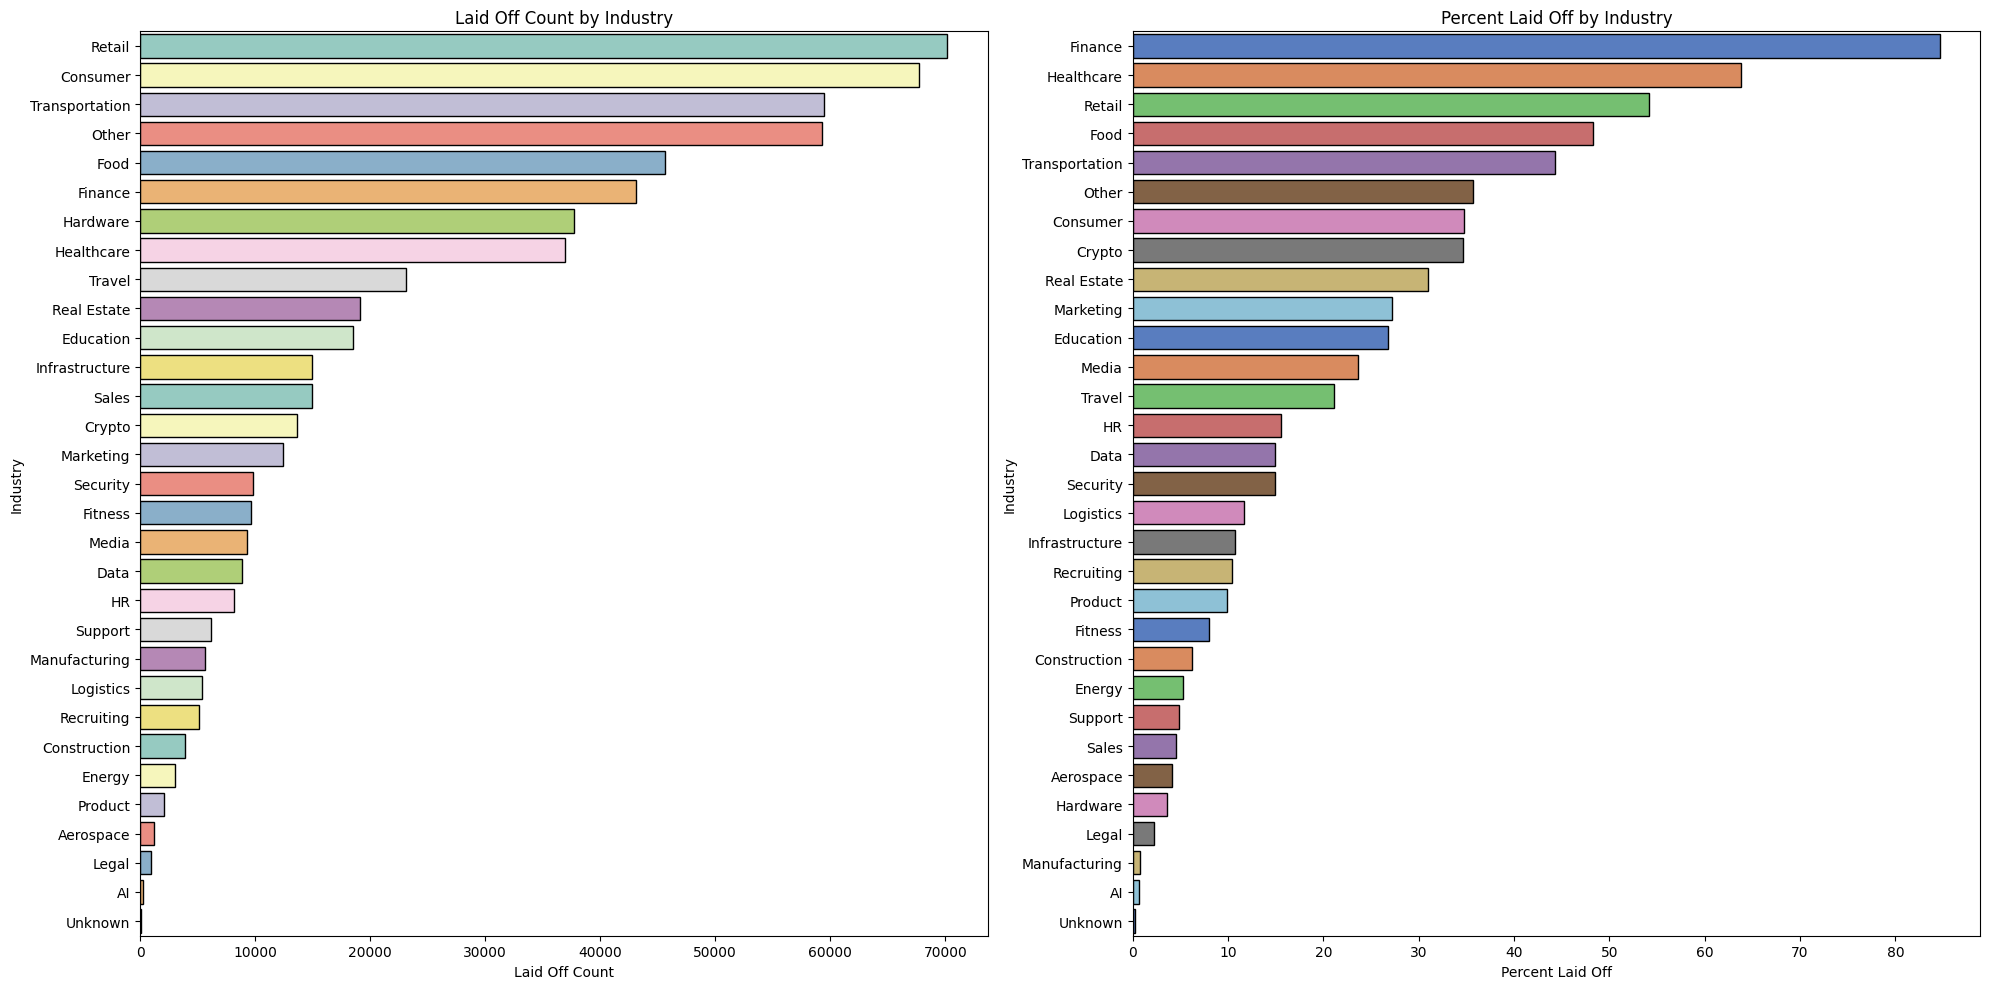

In [32]:
fig, ax = plt.subplots(1, 2,figsize=(20,10))
ax[0] = sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(),
            y='Industry', x='Laid_Off_Count', edgecolor='black', palette='Set3', ax=ax[0])
ax[0].set(title='Laid Off Count by Industry', xlabel='Laid Off Count')
ax[1] = sns.barplot(data=df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index(),
            y='Industry', x='Percentage', edgecolor='black', palette='muted', ax=ax[1])
ax[1].set(title='Percent Laid Off by Industry', xlabel='Percent Laid Off')
plt.tight_layout()
fig.show()

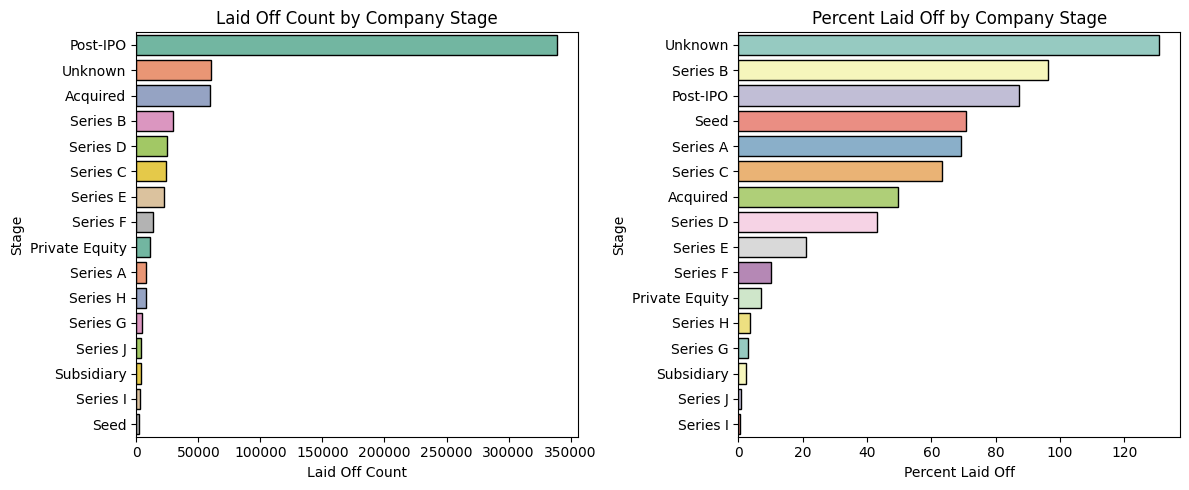

In [33]:
fig, ax = plt.subplots(1, 2,figsize=(12,5))
ax[0] = sns.barplot(data=df.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(),
            y='Stage', x='Laid_Off_Count',  edgecolor='black', palette='Set2', ax=ax[0])
ax[0].set(title='Laid Off Count by Company Stage', xlabel='Laid Off Count')
ax[1] = sns.barplot(data=df.groupby('Stage')['Percentage'].sum().sort_values(ascending=False).reset_index(),
            y='Stage', x='Percentage',  edgecolor='black', palette='Set3', ax=ax[1])
ax[1].set(title='Percent Laid Off by Company Stage', xlabel='Percent Laid Off')
plt.tight_layout()
fig.show()

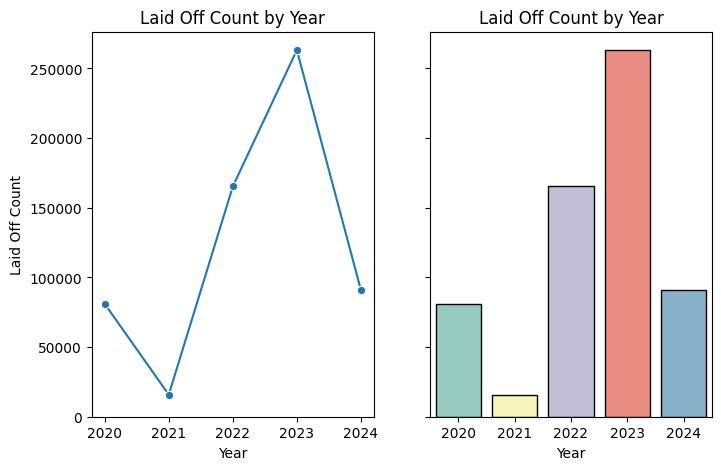

In [43]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,5))
ax[0] = sns.lineplot(data=df.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count',
                   marker='o', ax=ax[0])
ax[0].set(title='Laid Off Count by Year', ylabel='Laid Off Count')
ax[1] = sns.barplot(data=df.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count',
                   ax=ax[1], palette='Set3', linewidth=1,edgecolor='black')
ax[1].set(title='Laid Off Count by Year', ylabel='Laid Off Count')
fig.show()

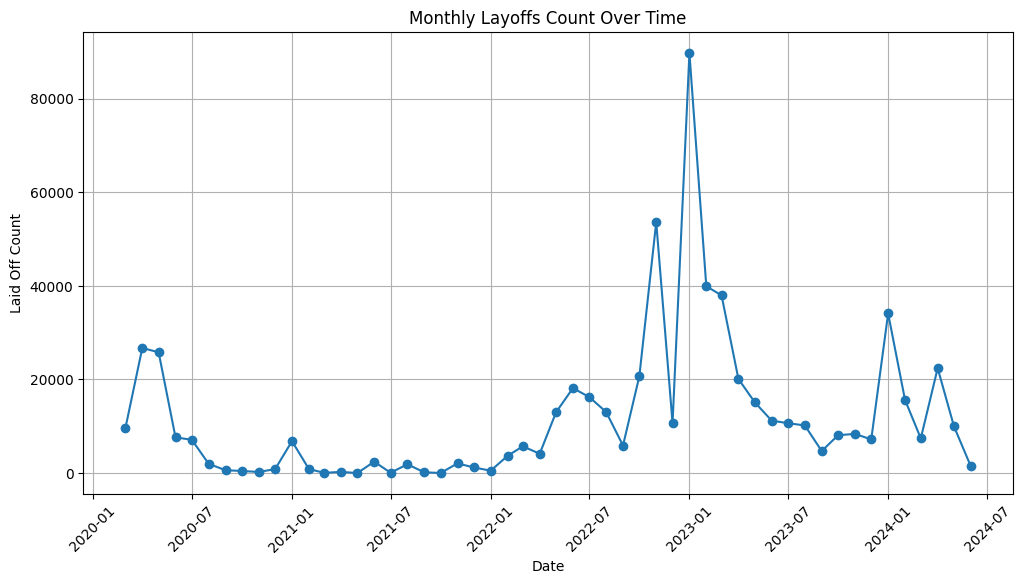

In [47]:
# 按月汇总裁员数量
monthly_data = df.groupby(df['Date'].dt.to_period('M'))['Laid_Off_Count'].sum().reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()

# 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Laid_Off_Count'], marker='o', linestyle='-')
plt.title('Monthly Layoffs Count Over Time')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


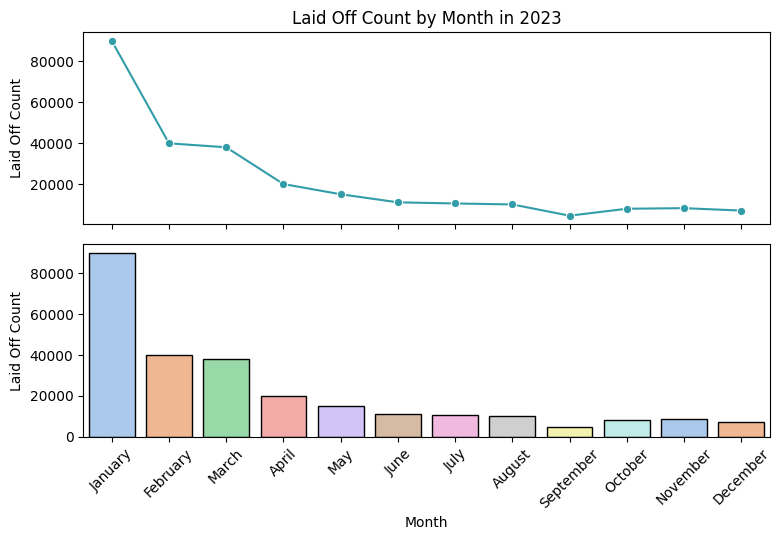

In [51]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5))
df_2023 = df[df['Year'] == 2023]

monthly_data_2023 = df_2023.groupby('Month')['Laid_Off_Count'].sum().reindex(month_order).reset_index()
ax[0] = sns.lineplot(data=monthly_data_2023, x='Month', y='Laid_Off_Count', marker='o', ax=ax[0], color='#329da8')
ax[0].set(title='Laid Off Count by Month in 2023', ylabel='Laid Off Count')

ax[1] = sns.barplot(data=monthly_data_2023, x='Month', y='Laid_Off_Count', ax=ax[1], palette='pastel', linewidth=1, edgecolor='black')
ax[1].set(ylabel='Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)
fig.show()

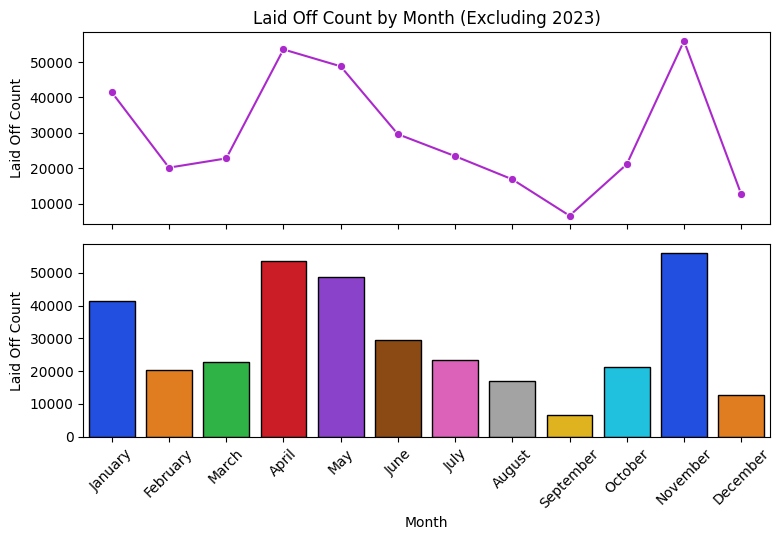

In [53]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5))

monthly_data_ex_2023 = df.query("Year != 2023").groupby('Month')['Laid_Off_Count'].sum().reindex(month_order).reset_index()
ax[0] = sns.lineplot(data=monthly_data_ex_2023, x='Month', y='Laid_Off_Count', marker='o', ax=ax[0], color='#ab29cc')
ax[0].set(title='Laid Off Count by Month (Excluding 2023)', ylabel='Laid Off Count')

ax[1] = sns.barplot(data=monthly_data_ex_2023, x='Month', y='Laid_Off_Count', ax=ax[1], palette='bright', linewidth=1, edgecolor='black')
ax[1].set(ylabel='Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)
fig.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '2020Q1'),
  Text(1, 0, '2020Q2'),
  Text(2, 0, '2020Q3'),
  Text(3, 0, '2020Q4'),
  Text(4, 0, '2021Q1'),
  Text(5, 0, '2021Q2'),
  Text(6, 0, '2021Q3'),
  Text(7, 0, '2021Q4'),
  Text(8, 0, '2022Q1'),
  Text(9, 0, '2022Q2'),
  Text(10, 0, '2022Q3'),
  Text(11, 0, '2022Q4'),
  Text(12, 0, '2023Q1'),
  Text(13, 0, '2023Q2'),
  Text(14, 0, '2023Q3'),
  Text(15, 0, '2023Q4'),
  Text(16, 0, '2024Q1'),
  Text(17, 0, '2024Q2')])

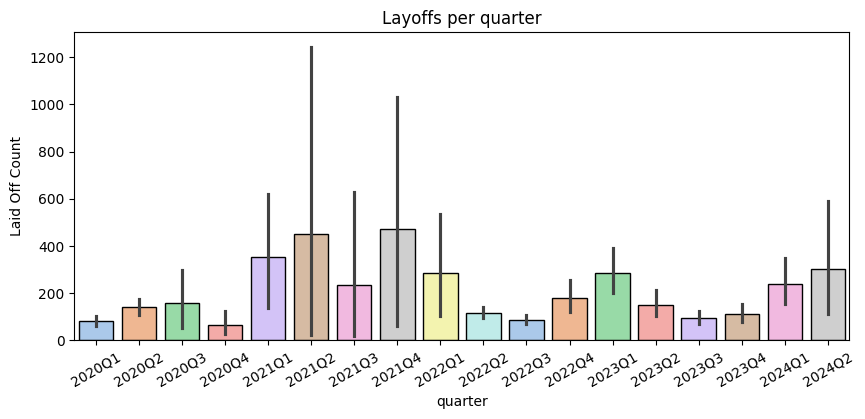

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(data=df.sort_values(by='quarter'), x='quarter', y='Laid_Off_Count',
                 linewidth=1, edgecolor='black', palette='pastel')
ax.set(title='Layoffs per quarter', ylabel='Laid Off Count')
plt.xticks(rotation=30)

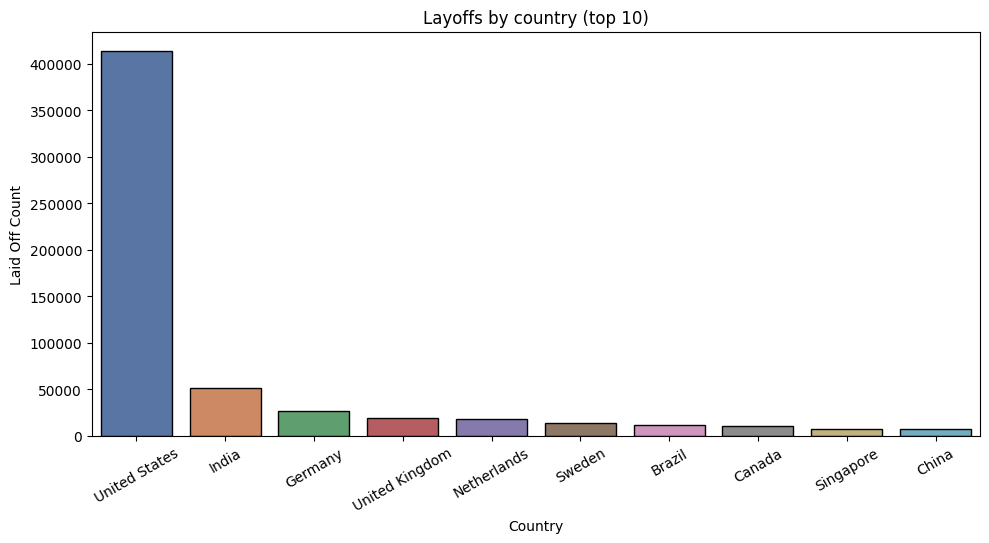

In [55]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(data=df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10), x='Country', y='Laid_Off_Count',
                 linewidth=1, edgecolor='black', palette='deep')
ax.set(title='Layoffs by country (top 10)', ylabel='Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

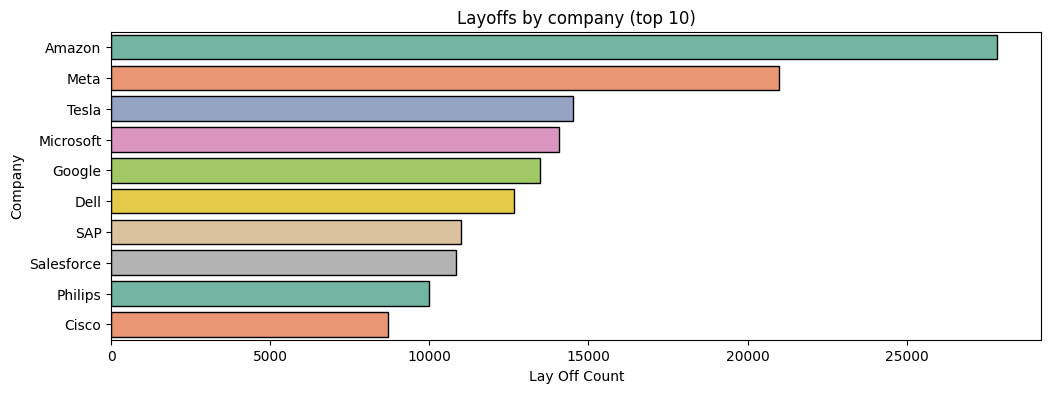

In [20]:
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(data= df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10),
                 x='Laid_Off_Count', y='Company'
                ,linewidth=1,edgecolor='black',  palette='Set2', ax=ax)
ax.set(title='Layoffs by company (top 10)', xlabel='Lay Off Count')
plt.show()

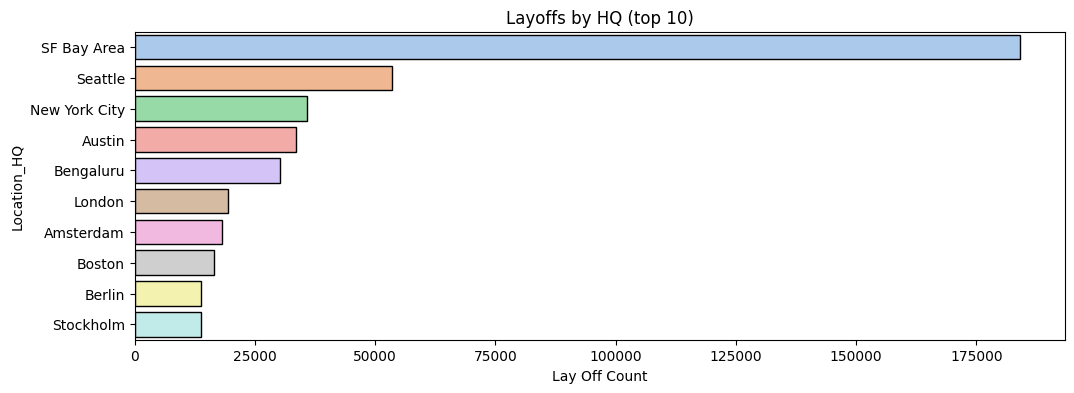

In [21]:
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(data= df.groupby('Location_HQ')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10),
                 x='Laid_Off_Count', y='Location_HQ'
                ,linewidth=1,edgecolor='black',  palette='pastel', ax=ax)
ax.set(title='Layoffs by HQ (top 10)', xlabel='Lay Off Count')
plt.show()

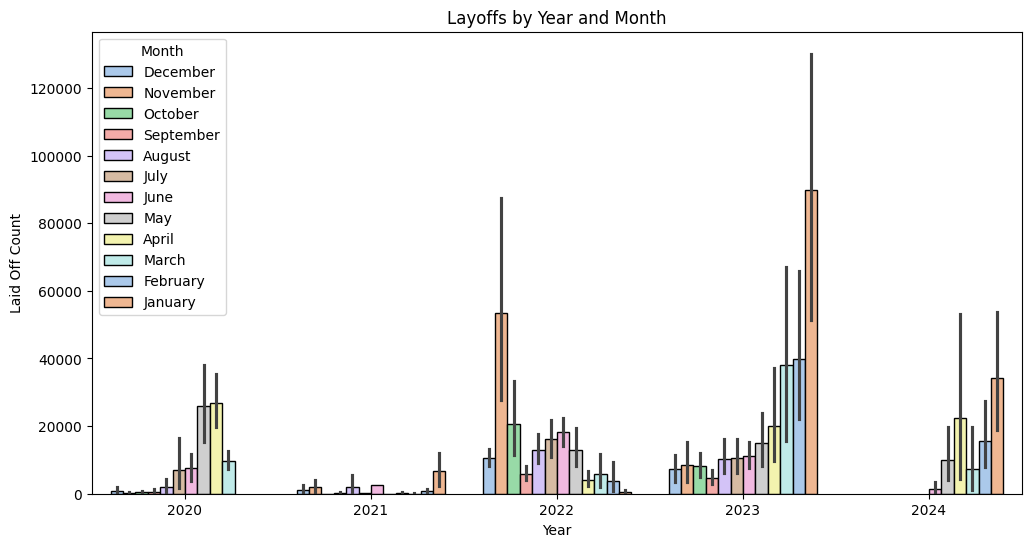

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df, x='Year', y='Laid_Off_Count', hue='Month',estimator=sum, edgecolor='black', ax = ax, palette='pastel')
ax.set(title='Layoffs by Year and Month', ylabel='Laid Off Count')
plt.show()
import plotly.express as px
world = df.groupby("Country")["Laid_Off_Count"].sum().reset_index()
figure = px.choropleth(world,locations="Country",
                       locationmode = "country names", color="Laid_Off_Count",
                       hover_name="Country",range_color=[1,10000],
                       color_continuous_scale="reds",
                       title="Countries having LayOffs")
figure.show()

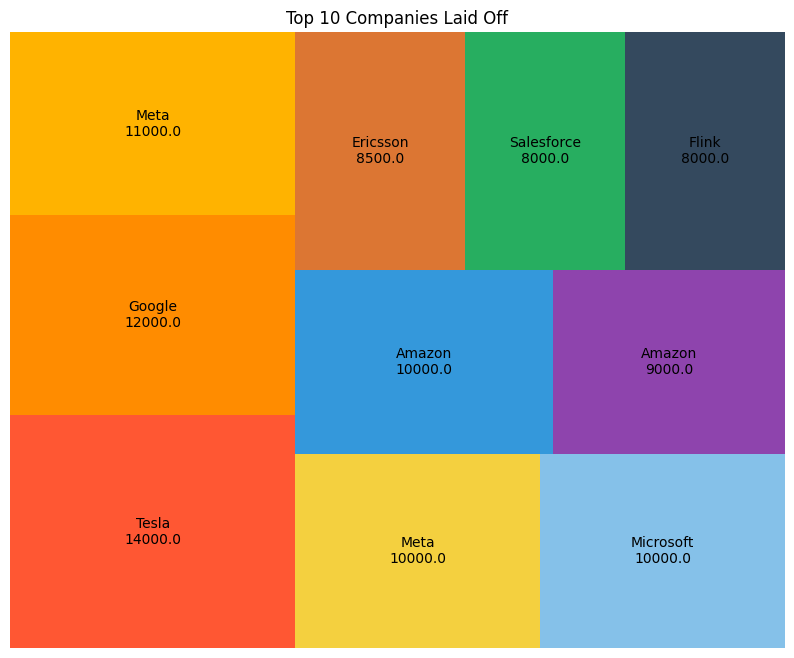

In [57]:
import squarify
sorted_df = df.sort_values('Laid_Off_Count', ascending=False).head(10)
Companies = sorted_df["Company"].tolist()
Laid_off_count = sorted_df['Laid_Off_Count'].tolist()
colors = ['#FF5733', '#FF8C00', '#FFB300', '#F4D03F', '#85C1E9', '#3498DB', '#8E44AD', '#DC7633', '#27AE60', '#34495E']
sizes = [count / sum(Laid_off_count) for count in Laid_off_count]
labels = [f'{company}\n{laid_off_count}' for company, laid_off_count in zip(Companies, Laid_off_count)]
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes,label = labels, color=colors)
plt.title('Top 10 Companies Laid Off')
plt.axis('off')
plt.show()